<h1> TITLE: </h1>
<hr>
<h2>SUBTITLE<h2/>
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

<img src="INSERT PICTURE" style="vertical-align:bottom">
<br>
<br>

## Project Outline
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

### 1. Acquire, prepare and clean data set.

- ACQUIRE DESCRIPTION 
<br>

### 2. Perform Exploratory Data Analysis on the unencoded data set

- EDA DESCRIPTION
    
### 3. Recommendations and Takeaways:

- document takeaways and conclusion

## Executive Summary:
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

<h2>Questions we answered</h2>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">

<h3> Q1?</h3>
- Answer.

<h3> Q2? </h3>
- Answer.

<h3> Q3? </h3>
- Answer.

<h3> Q4? </h3>
- Answer.

<h3> Q5? </h3>
- Answer.

<h3> Q6? </h3>
- Answer.

<h3> Q7? </h3>
- Answer.

## 1. Data Wrangle: Show off our Acquire/Prep/Cleaned DataFrame. Summary of removed data.
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

In [1]:
## Import function code/master prepare DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
import explore
from env import get_db_url
import time
import warnings
warnings.filterwarnings("ignore")


## 2. Exploratory Data Analysis
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

In [2]:
# master visual settings.

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 20
plt.figure(figsize=(35, 12), constrained_layout=True)

<Figure size 2520x864 with 0 Axes>

<Figure size 2520x864 with 0 Axes>

***

<div class="alert alert-block alert-success">
    <b>Q1.</b> Which lesson appears to attract the most traffic consistently across cohorts (per program)?
</div>

#### How can I answer this question?
- Group by Program
- Get an aggregated count of the path(s) per program
- Identify lessons that attract the most traffic

In [3]:
# call and set the dataframe
df1 = prepare.prepare_logs()
df1 = prepare.get_q6_eda_df()

#### First I will drop nulls so that all cohorts match with a path (lesson)

In [4]:
df1 = df1.dropna()

#### Then, I'll remove some excess paths that aren't defined as lessons. (This is not all of them, just as many as could be found in the allotted time.)

In [5]:
explore.q1_remove_columns(df1)

#### Finally, I'll create a dataframe for each program to properly answer the question. 

In [6]:
# gets full stack java dataframe
java = explore.q1_full_stack_java(df1)

# gets data science dataframe
data_science = explore.q1_data_science_program(df1)

# gets full stack php dataframe
php = explore.q1_full_stack_php(df1)

# gets front end programming dataframe
front_end = explore.q1_front_end_programming(df1)

---

### Exploring Question 1

To explore this question, I took a look at the top most active and most visited paths to answer the question 'which lesson appears to attract the most traffic'. 

#### Exploring the Full Stack Java program:

In [7]:
explore.q1_display_paths_java(java)

,path
/,35814
javascript-i,17457
toc,17428
search/search_index.json,15212
java-iii,12683
html-css,12569
java-ii,11719
spring,11376
jquery,10693
mysql,10318


#### Exploring the Data Science program

In [8]:
explore.q1_display_path_ds(data_science)

,path
/,8358
search/search_index.json,2203
classification/overview,1785
1-fundamentals/modern-data-scientist.jpg,1655
1-fundamentals/AI-ML-DL-timeline.jpg,1651
1-fundamentals/1.1-intro-to-data-science,1633
classification/scale_features_or_not.svg,1590


#### Exploring the Full Stack PHP program

In [9]:
explore.q1_display_path_php(php)

,path
/,1681
index.html,1011
javascript-i,736
html-css,542
spring,501
java-iii,479
java-ii,454
java-i,444
javascript-ii,429
appendix,409


#### Exploring the Front End Programming program

In [10]:
pd.DataFrame(front_end.path.value_counts())

,path
content/html-css,2
/,1
content/html-css/gitbook/images/favicon.ico,1
content/html-css/introduction.html,1


<div class="alert alert-block alert-warning"> 
    
Question 1: Takeaway
    
"Which lesson appears to attract the most traffic consistently across cohorts (per program)?"
    
</div>

<div class="alert alert-block alert-warning"> 
    
Full Stack Java
    
&nbsp; 
    
The lesson with the most traffic in the Full Stack Java program is Javascript I.
    
</div>

<div class="alert alert-block alert-warning"> 
    
Data Science Program
    
&nbsp; 
    
The lesson with the most traffic in the Data Science program is Classification.
    
</div>

<div class="alert alert-block alert-warning"> 
    
Full Stack PHP Program
    
&nbsp; 
    
The lesson with the most traffic in the Full Stack PHP program is also Javascript I. 
    
</div>

<div class="alert alert-block alert-warning"> 
    
Front End Programming Program
    
&nbsp; 
    
The lesson with the most traffic in the Front End Programming program is HTML-CSS
    
</div>

##### SQL has the most traffic consistently across all cohorts and programs, not including the Front End Programming program which has a sample of 5. 

***

***

<div class="alert alert-block alert-success">
    <b>Q2.</b> QUESTION HERE
</div>

In [11]:
### Narrative here

In [12]:
### explore code, visualization code here

#(visualizations/dataframes below. Do not exceed 5. Include takeaway in MD after each visual/DF. Refer to master scaling parameters for font and chart size)

<div class="alert alert-block alert-warning"> 
    
<b>Takeaway:</b>
    
- TAKEAWAY and QUESTION ANSWER HERE
    
</div>

***

***

<div class="alert alert-block alert-success">
    <b>Q3.</b> Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
</div>

In [13]:
df = prepare.prepare_logs()
# this user-defined function includes an acquire which pulls in data and wrangles it in useable form
df3 = explore.explore_question3(df)
# this user-defined function prepares data specifically for question 3 exploration

#### What factors seem to influence program access? cohort, program type, course dates, outside events (ie.COVID-19 pandemic)?
   -  Visualize Average user access with cohort, program type, and course dates
   -  Determine if there is an access trend with cohort, program type, and course dates

Text(0.5, 1.0, 'Average User Access Counts Per Program/Cohort')

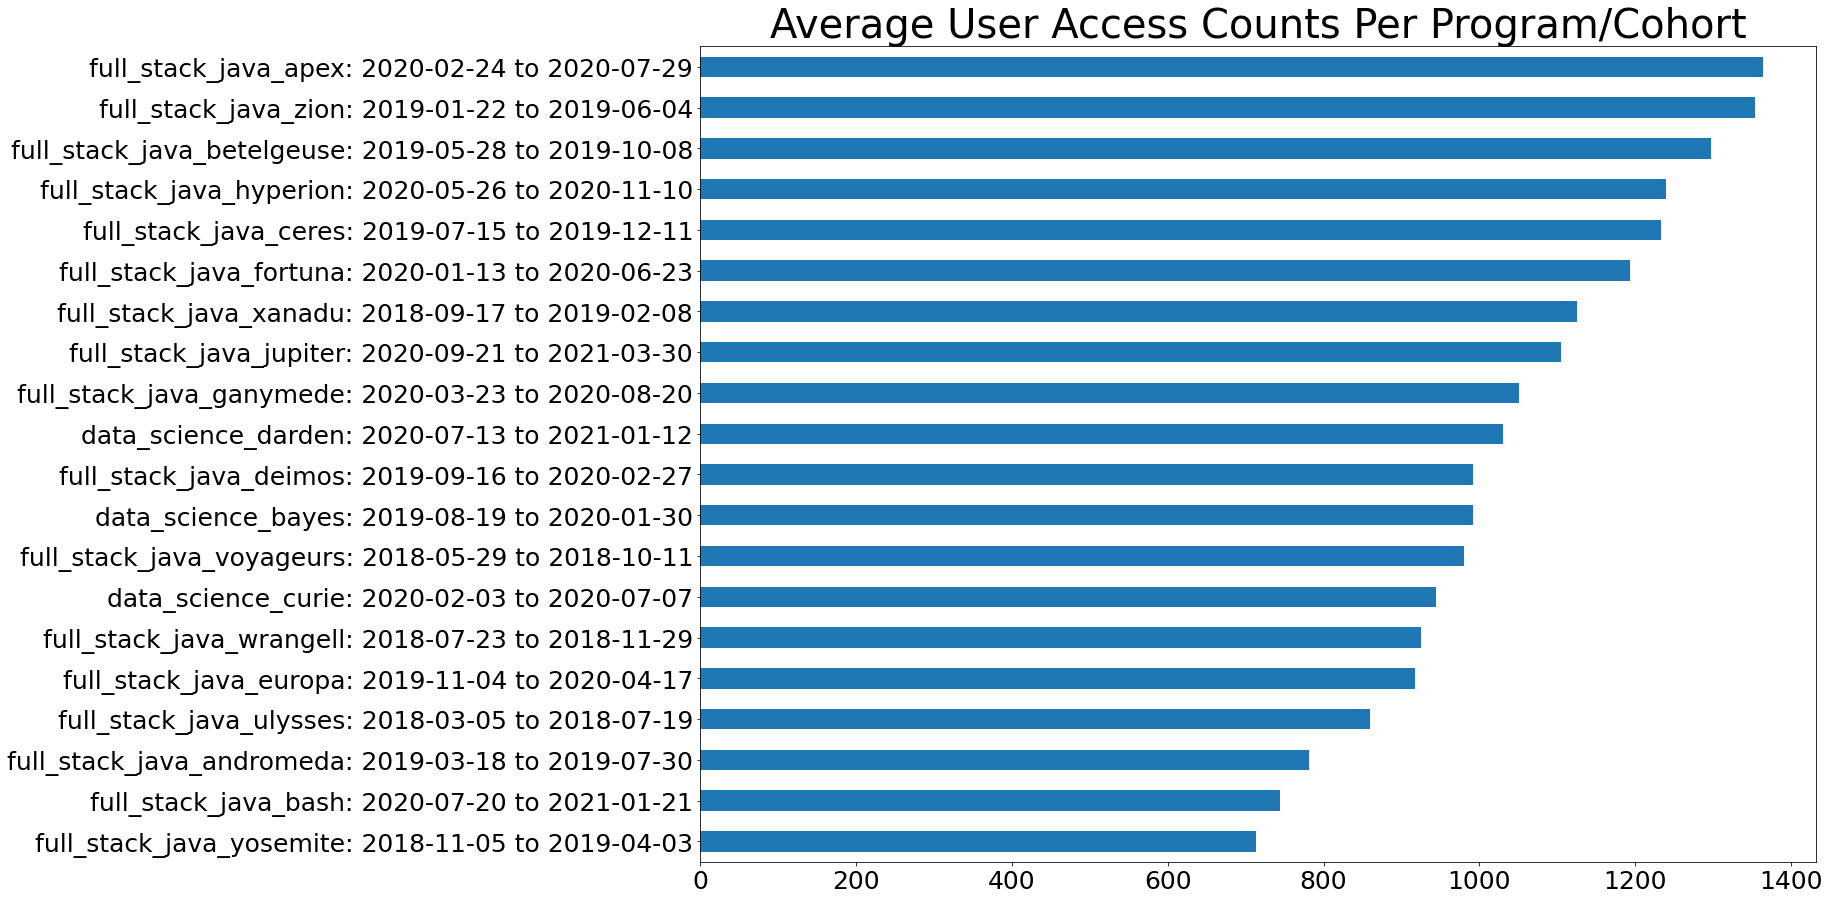

In [14]:
plt.figure(figsize=(20,15)) #figure size
(df3.cohort_dates.value_counts()/df3.user_id.groupby(df3.cohort_dates).nunique()).sort_values(ascending=True).plot(kind='barh', fontsize=25)
# creates horizontal bar chart with specified data
plt.title('Average User Access Counts Per Program/Cohort', fontsize=40) #figure title

#### Takeaways: Average User Access Counts Per Program/Cohort Graph

- While there does seem to be a signifant difference in program access for certain cohorts, it is unclear why based on data presented here. 
- There does not appear to be a relationship with the type of program or cohort dates (including pre and post pandemic) 
- With additional data (ie. instructors, in-person vs. virtual), I could assess this cohort-curriculum access relationship further. 

#### Who are the users that access the curriculum the least? 
- Break the data down into quantiles (bottom 5% of access, bottom 25% of access, middle 25-75% of access, and top 25% of access) for comparisons. 
- With the 4 sub-populations, groupby user_id's last access date and calculate the difference of the program end date to the user's last access date. This will tell us when the sub-population's stopped accessing the curriculum during their program.

In [15]:
bottom_5, bottom_25, middle, top_25, all_users, middle_users, top_25_users, bottom_25_users, bottom_5_users = explore.q3_create_percentile_dfs(df3)
#user-defined function that creates 9 new dataframes specific to amount of access and prints number of records


All Access Records: 530,803 records (between 1-4763 program access occurrences) 
Bottom 5% Access Records: 1,188 records (less than 113 program access occurrences)
Bottom 25% Access Records: 42,824 records (less than 625 program access occurrences)
Middle 25-75% Access Records: 487,979 records (between 625-1380 program access occurrences)
Top 25% Access Records: 240,849 records (between 1380-4763 program access occurrences)

------------------------------------------------

All Access Records: 510 records
Bottom 5% Users: 26 records
Bottom 25% Users: 128 records
Middle 25-75% Users: 382 records
Top 25% Users: 129 records

------------------------------------------------


#### Takeaways: Creating New Dataframes
- As we can see, I chose not to split the data into even quartiles because I want to highlight the very bottom (bottom 5%) of accessors in addition to the bottom 25%. The first 5 dataframes seen here will be used to look at access counts and trends while the last 5 dataframes will be used to show individual users and their last day of access in the duration of their program.

#### Are there differences in the day and time of user access for bottom, middle, and top accessors?
- Explore and visualize average access counts & trends of the four sub-populations
- Determine if there are differences in weekday access and access time of sub-populations.  

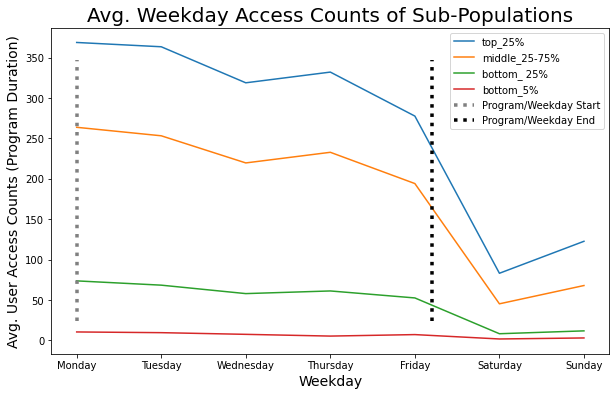

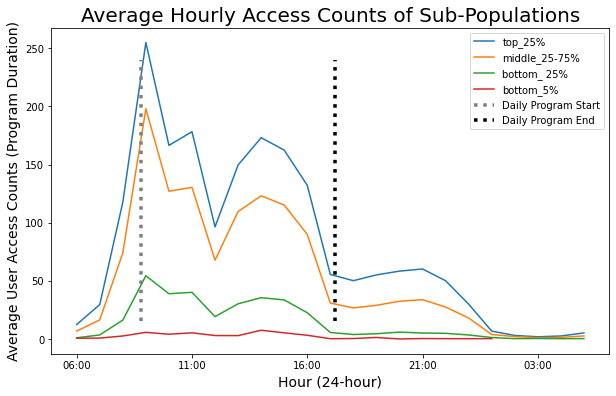

In [16]:
explore.q3_plot_counts(bottom_5, bottom_25, middle, top_25)
#user-defined function to plot counts of sub-populations by weekday access and hour access

#### Takeaways: Sub-Population Access Counts
- Both sub-populations of middle and top access follow very similar patterns of access days and times. 
- Unsuprisingly, average user access counts for the bottom 25% and 5% of accessors is much lower and, especially for the bottom 5%, difficult to see a trend. It looks like the bottom 25% of accessors follow a similar trend of access to populations over 25% of access, but perhaps not as much difference between weekdays/weekends and program hours/off hours. To further visualize the potential relevance, I will graph this as a percentage of access in the sub-population.

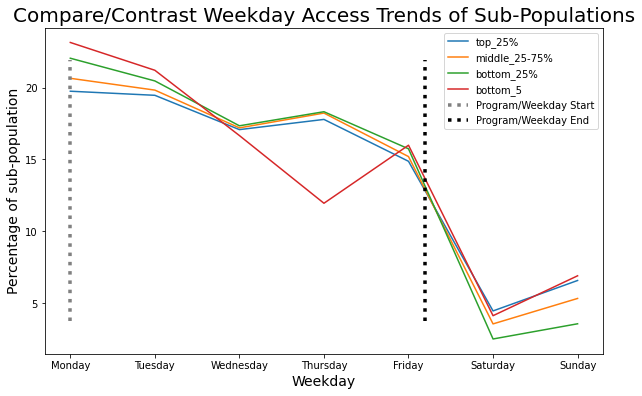

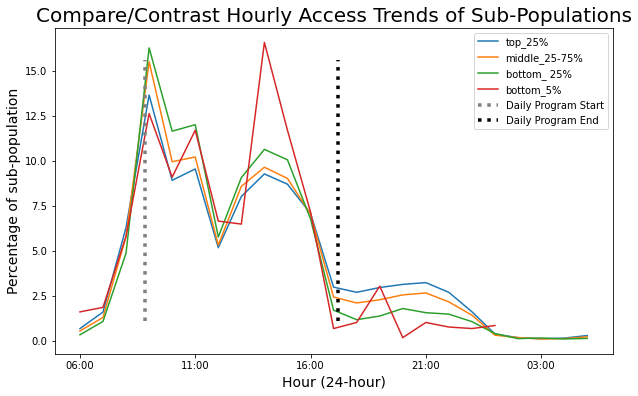

In [17]:
explore.q3_plot_trends(top_25, middle, bottom_25, bottom_5)
#user-defined function to plot trends of weekday & time of day access

#### Takeaways: Sub-Population Access Trends
- There does not seem to be a significant difference in weekday of time of day access trends of sub-populations and in fact, all sub-populations follow very similiar access trends although access counts vary significantly as seen in previous graphs.
- The only notable differences is the bottom 5% of accessors have a significant dip in Thursday access and have a spike in access near the end of the work day (around 4pm)
- It is worth noting that there are significantly less records in the bottom 5% than all other sub-populations

#### When do the bottom accessors tend to stop accessing the curriculum during their course? Is this different than the middle and top accessors?
 - With the 4 sub-populations, groupby user_id's last access date and calculate the difference of the program end date to the user's last access date. This will tell us when the sub-population's stopped accessing the curriculum during their program.
 - Visualize the last day of curriculum access of users in sub-populations to determine if there is a difference

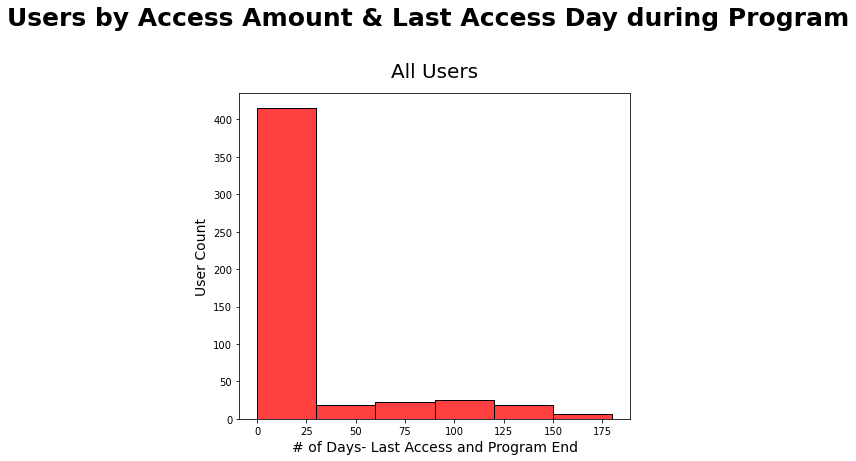

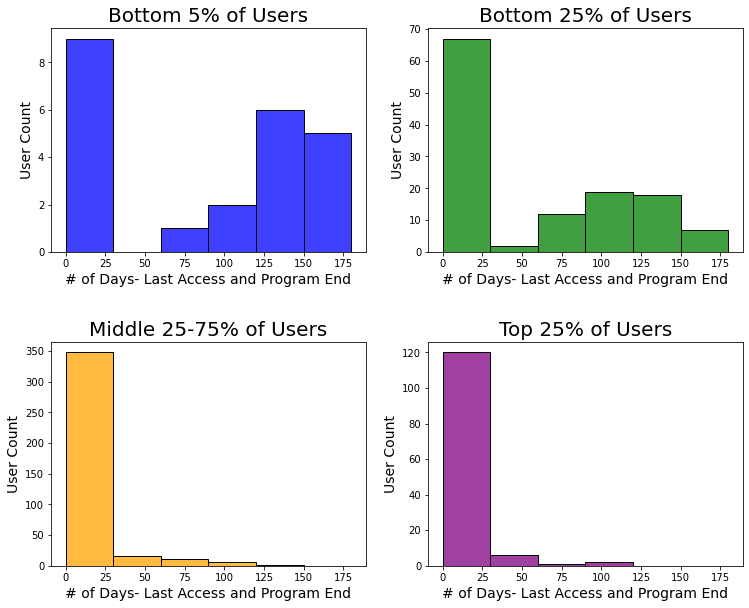

In [18]:
explore.q3_plot_hists(all_users, bottom_5_users, bottom_25_users, middle_users, top_25_users)

#### Takeaways: Last Day of Access
- Here we see a very significant change in last day of access during the program in sub-populations
- The majority of the bottom 5% of users' last access day was over 100 days prior to the course end date. This leads me to believe that many of those students did not complete the program, but this is only a hypothesis.
- Interestingly, with the bottom 5% and bottom 25% user populations, the day of last access is somewhat steady throughout the program meaning that there isn't one point in the program where these students stop accessing, but a steady fall off throughout the program. This is especially true for the bottom 25%. The bottom 5% has more user last access records near the beginning of the program.
- Populations of all users, middle 25-75% and top 25% has a very low number of students (compared to their population) that stopped accessing the curriculum a month of more prior to the program end date.

In [19]:
df3.user_id.value_counts().mean()

1040.7901960784313

<div class="alert alert-block alert-warning"> 
    
<b>Takeaways: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?</b>
</div>

- The bottom 5% of program accessors have between 1-112 access occurance through the duration of their programs which is less than one access a day on average. 
- The bottom 5% of program accessors have up to 624 access occurance through the duration of their programs which is much higher than the bottom 5%, but almost twice as low as the access occurance mean which is 1041.
- Cohort appears to be a signifanct factor in user access, but it is unclear why as the program dates and program type do not seem to be a factor.
- The top 3 cohorts with the greatest average access (over 1200 average access occurances) are:
 > - Apex (program: full stack java, dates: 2020-02-04 to 2020-07-29)
 > - Zion (program: full stack java, dates: 2019-01-22 to 2019-06-04)
 > - Betelgeuse (program: full stack java, dates: 2019-05-28 to 2019-10-08)
    
- The bottom 3 cohorts with the least average access (less than 800 average access occurances) are: 
    
 > - Yosemite (program: full stack java, dates: 2018-11-05 to 2019-04-03)
 > - Bash (program: full stack java, dates: 2020-07-20 to 2021-01-21)
 > - Andromeda (program: full stack java, dates: 2019-03-18 to 2019-07-30)
    
- Because the cohort seems to be a significant factor in program access amount, as a next step, I would like to gather additional data (ie. instructors, in-person vs. virtual student distributions per cohort) to explore potential drivers of access per cohorts
    
- The exploration of individual users to program access amount revealed that the students with low access have a high probability (~50% for bottom 25% of users and ~65% for bottom 5% of users) of ceasing to access the curriculum over a month before the program end date. The last access day, especially for the bottom 25%, appears to occur at a somewhat steady rate throughout the duration of the program.
    
#### Next Steps: 

- With the data available in this dataset, I cannot draw conclusions on why the bottom accessors cease accessing the curriculum and I'd like to request more data to evaluate the following questions:

- Do students stop accessing because they feel they've acquired enough knowledge? (assess a relationship between access and student performance)

- Could ceasing access be due to dropping out of the program? If so, how often does this occur?

- Do the instructors seem to influence the amount of program access?

***

***

<div class="alert alert-block alert-success">
    <b>Q4.</b> QUESTION HERE
</div>

In [20]:
### Narrative here

In [21]:
### explore code, visualization code here

#(visualizations/dataframes below. Do not exceed 5. Include takeaway in MD after each visual/DF. Refer to master scaling parameters for font and chart size)

<div class="alert alert-block alert-warning"> 
    
<b>Takeaway:</b>
    
- TAKEAWAY and QUESTION ANSWER HERE
    
</div>

***

***

<div class="alert alert-block alert-success">
    <b>Q5.</b> QUESTION HERE
</div>

In [22]:
### Narrative here

In [23]:
### explore code, visualization code here

#(visualizations/dataframes below. Do not exceed 5. Include takeaway in MD after each visual/DF. Refer to master scaling parameters for font and chart size)

<div class="alert alert-block alert-warning"> 
    
<b>Takeaway:</b>
    
- TAKEAWAY and QUESTION ANSWER HERE
    
</div>

***

***

<div class="alert alert-block alert-success">
    <b>Q6.</b> Which topics are grads continuing to reference after graduation and into their jobs (for each program)?
</div>

In [24]:
### Narrative here

In [25]:
### explore code, visualization code here

#(visualizations/dataframes below. Do not exceed 5. Include takeaway in MD after each visual/DF. Refer to master scaling parameters for font and chart size)

<div class="alert alert-block alert-warning"> 
    
<b>Takeaway:</b>
    
- TAKEAWAY and QUESTION ANSWER HERE
    
</div>

***

***

<div class="alert alert-block alert-success">
    <b>Q7.</b> QUESTION HERE
</div>

_Least accessed by cohort could work only if I can recreate a dataframe that correctly holds values in 'path' that represent a proper lesson from codeup. As the path is currently jumbled with miscellaneous paths, it would take a extra amounts of time to identify paths then create this dataframe that I do not have for the course of this project_

### Least Accessed Overall

For the least accessed overall, I will identify the least accessed as paths that have been accessed at least 75 times but no more than 100 times. This is because the number of paths that have been accessed less than 75 times is over 9,500. While there may be a lesson in there that has been accessed only once, the sample is too small to call it active or relevant.

In [26]:
least_accessed = explore.q1_get_least_accessed(df1)
least_accessed.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
506604,6-regression/2-acquire-and-prep,616,55.0,70.114.9.241,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 11:39:02
506668,6-regression/2-acquire-and-prep,580,55.0,74.192.167.159,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 12:00:27
506723,6-regression/2-acquire-and-prep,580,55.0,74.192.167.159,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 12:26:49
506747,6-regression/2-acquire-and-prep,580,55.0,74.192.167.159,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 12:52:54
506827,6-regression/2-acquire-and-prep,576,55.0,99.126.113.140,curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,data_science,2020-04-08 13:37:16


<div class="alert alert-block alert-warning"> 
    
<b>Takeaway:</b>
    
The least access path with the set conditions is the `Regression, acquire and prepare lesson.`
    
&nbsp; 
    
This lesson was accessed by the Data Science cohorts `Curie, Bayes and Darden` for a total of `77 times`. The last access date for this lesson was `January 22nd, 2021`.  
    
</div>

### Least Accessed Controlling for Program

### Full Stack Java

In [27]:
explore.q1_display_least_accessed(java)

,path
python/series,84
classification/decision-trees,82
appendix/extra-challenges/java-file-io-extras,80
timeseries/prep,80
python/functions,79
6-regression/2.0-acquire-and-prep,77
python/dataframes,77
appendix/angular/models,76
8-clustering/3-wrangle,76
6-regression/5.0-evaluate,76


### Data Science

In [28]:
explore.q1_display_least_accessed(data_science)

,path
4-python/7.4.1-pandas-overview,84
12-distributed-ml/6-ml-with-spark,84
4-python/8.4.1-pandas-overview,83
individual-project/individual-project,81
6-regression/4-explore,80
storytelling/creating-charts,79
appendix/documentation,78


### Full Stack PHP

In [29]:
explore.q1_display_least_accessed(php)

,path
content/git/creating-a-repository.html,84
content/html-css/gitbook/images/favicon.ico,83
mysql/relationships/indexes,82
java-iii/finish-the-adlister,79
content/javascript_ii,77
content/mysql/intro-to-mysql,77
jquery/ajax,77
mysql/intellij,76


### Front End Programming

#### The least accessed for Front End Programming is HTML-CSS as it is the only lessons that were offered.

<div class="alert alert-block alert-warning"> 
    
<b>Takeaway:</b>
#### Full Stack Program
    
The least access path in the Full Stack Java Program is the `Classification, tidy-data lesson.`
    
&nbsp; 
    
This lesson was accessed by the Full Stack Java cohorts, but mainly `Staff` for a total of `76 times`. The last access date for this lesson was `April 21st, 2021`.  

&nbsp; 
    
#### Data Science Program
    
The least access path in the Data Science program is the `Story-telling, creating charts` lesson.`
    
&nbsp; 
    
This lesson was accessed by the Data Science cohorts for a total of `79 times`. The last access date for this lesson was `April 21st, 2021`.  
    
&nbsp; 
    
#### PHP Program
    
The least access path in the Full Stack PHP is the `MySQL, intellij` lesson.
    
&nbsp; 
    
This lesson was accessed by the Full Stack PHP cohorts for a total of `76 times`. The last access date for this lesson was `April 10th, 2021`.  
    
&nbsp; 

#### Front End Programming    
Front end programming sample size is `too small` to properly define as having a least accessed lesson, when it didn't offer many lessons to a sizable group of individuals. However, it did have `2 visits on the HTML-CSS Program`
    
    
    
</div>

***

***

<div class="alert alert-block alert-warning">
    <b> SUMMARY of Takeaways:</b>
<br>
1. SUMMARY of Q1
<br>
2. SUMMARY of Q2
<br>
3. SUMMARY of Q3
<br>
4. SUMMARY of Q4
<br>
5. SUMMARY of Q5
<br>
6. SUMMARY of Q6
<br>
7. SUMMARY of Q7
<br>
</div>

# 3. Key Findings and Recommendations
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

<h2> Key Findings</h2>
<br>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">
1. Finding 1
    <br>
    <br>
2. Finding 2

<h2> Recommendations </h2>
<br>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">

<b> 1. Recommendation 1 <b>
<br>
<b> 2. Recommendation 2<b>
<br>
<b> 3. Recommendation 3 <b>